In [1]:
# import all required libraries for reading, analysing and visualizing data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

In [2]:
#importing data
train_df = pd.read_csv("C:\\Users/Prithish/Desktop/Metro_Interstate_Traffic_Volume.csv") 


## Data Description and stats

In [3]:
print('Dataset shape: ', train_df.shape)

Dataset shape:  (48204, 9)


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [5]:
train_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [6]:
train_df.describe(include = 'all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,48204,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,12,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-05-19 10:00:00,NaN
freq,48143,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


In [7]:
train_df.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

## DATA CLEANING

In [8]:
# convert the date_time column to datetime type
train_df['date_time'] = pd.to_datetime(train_df['date_time'])

In [9]:
train_df['time'] = train_df['date_time'].dt.hour

In [10]:
train_df['month'] = train_df['date_time'].dt.month

In [11]:
train_df['year'] = train_df['date_time'].dt.year

In [12]:
train_df['day'] = train_df['date_time'].dt.day_name()

In [13]:
train_df['holiday'].value_counts()

None                         48143
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: holiday, dtype: int64

In [14]:
z = lambda x: False if x == 'None' else True
train_df['holiday'] = train_df['holiday'].apply(z)

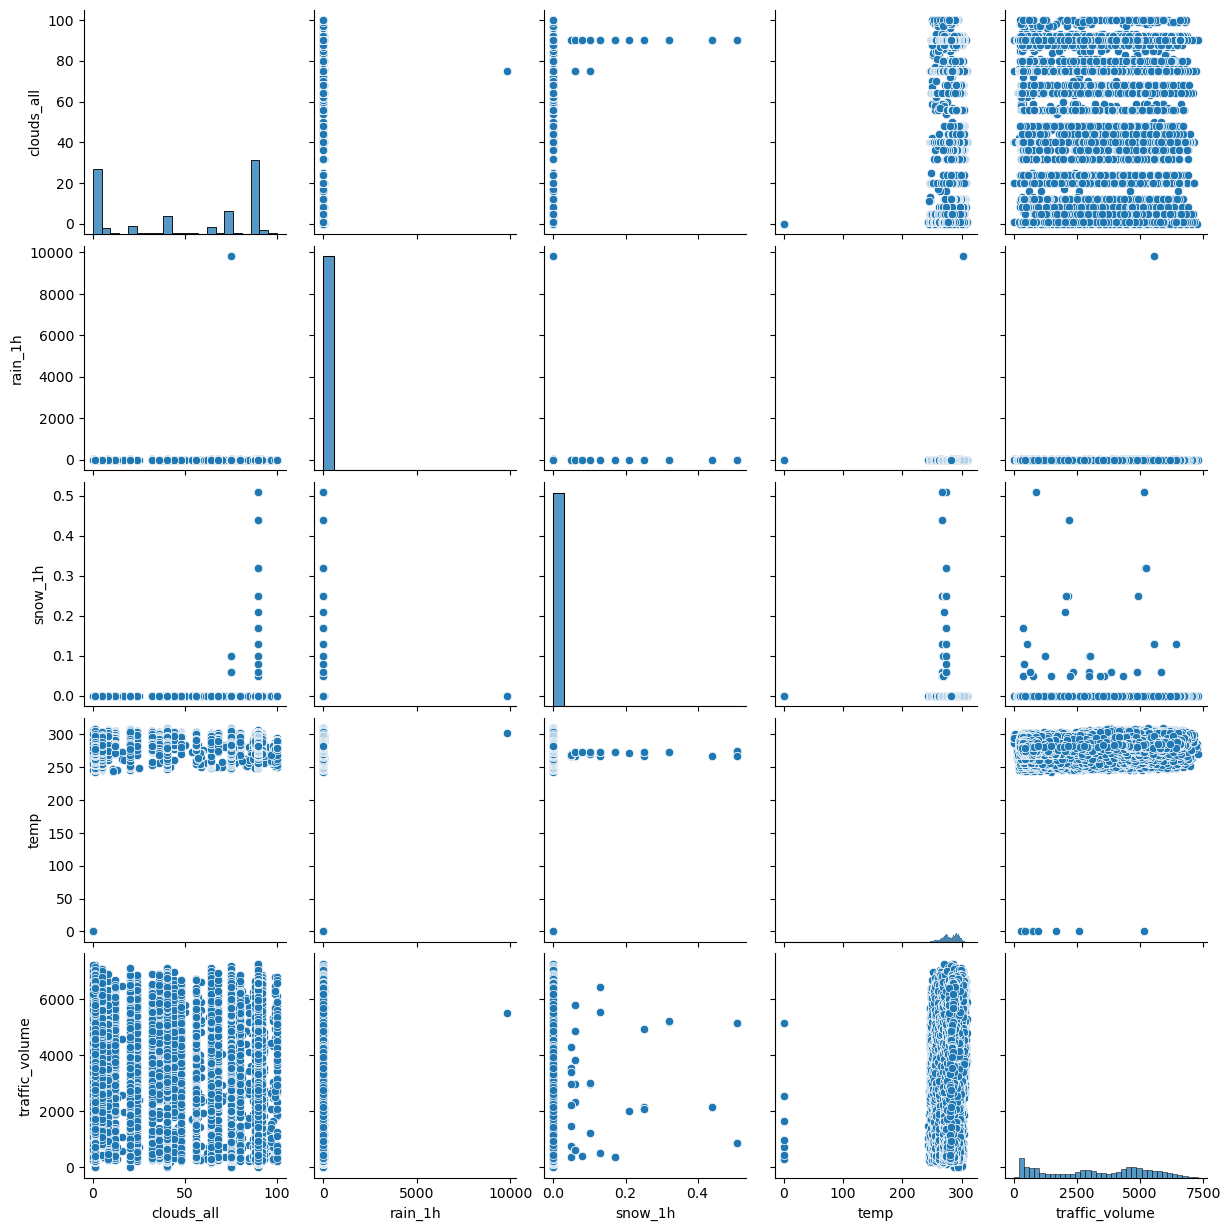

In [15]:
cols =['clouds_all','rain_1h','snow_1h','temp','traffic_volume']
sns.pairplot(train_df[cols])
plt.show()

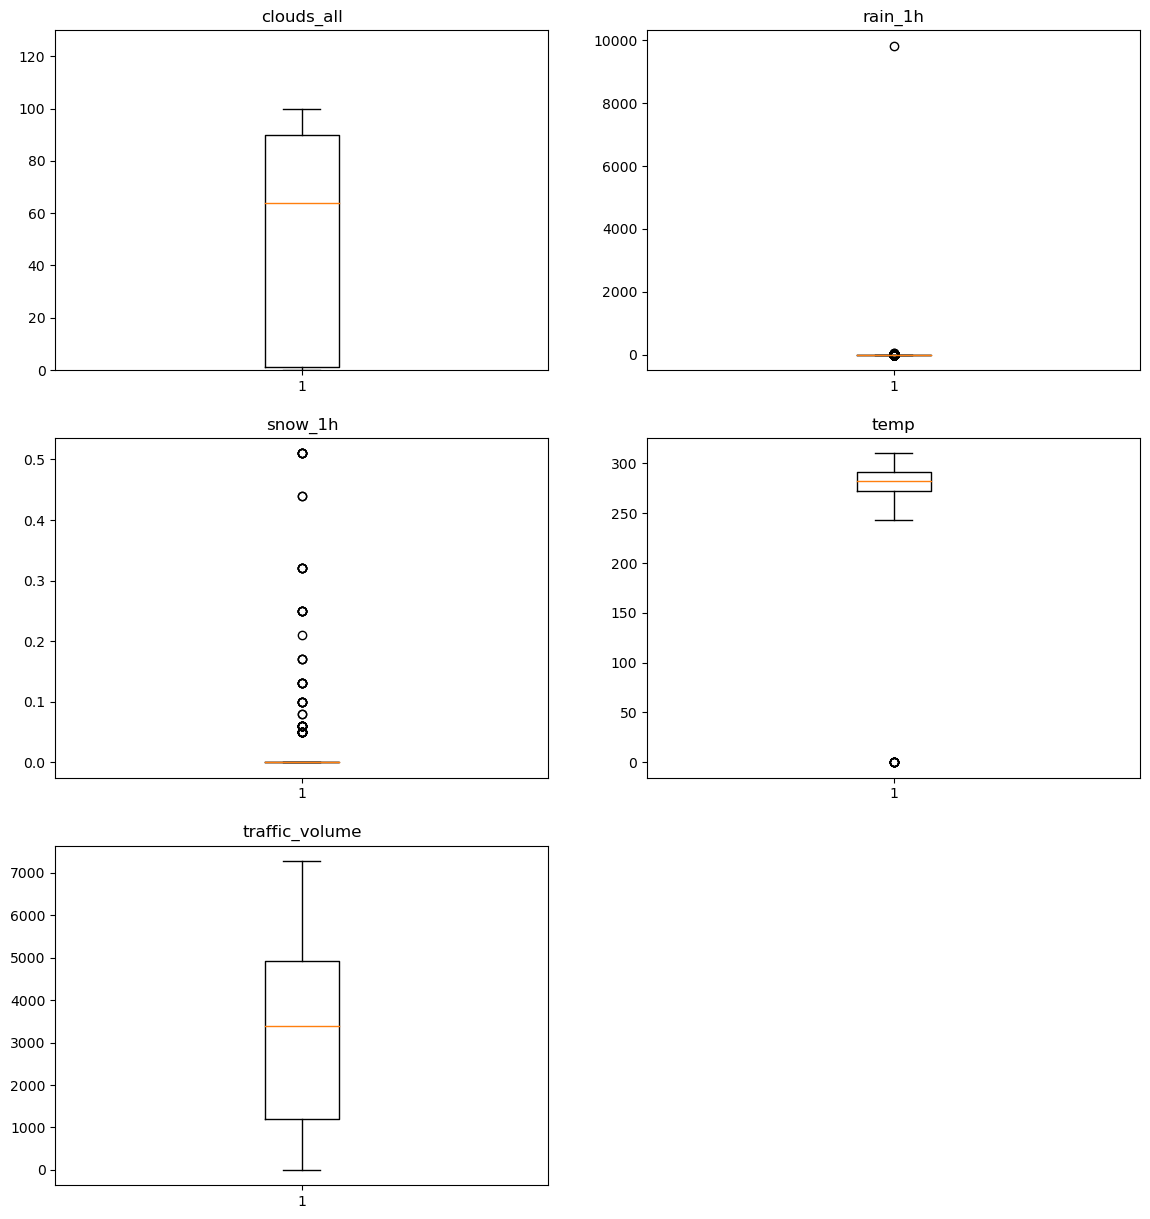

In [16]:
plt.figure(figsize=(14,15))
plt.subplot(3,2,1)
plt.boxplot(train_df['clouds_all'])
plt.ylim(0,130)
plt.title('clouds_all')

plt.subplot(3,2,2)
plt.boxplot(train_df['rain_1h'])
plt.title('rain_1h')

plt.subplot(3,2,3)
plt.boxplot(train_df['snow_1h'])
plt.title('snow_1h')

plt.subplot(3,2,4)
plt.boxplot(train_df['temp'])
plt.title('temp')

plt.subplot(3,2,5)
plt.boxplot(train_df['traffic_volume'])
plt.title('traffic_volume')

plt.show()

In [17]:
train_df = train_df[train_df['temp'] != 0]

In [18]:
train_df = train_df[train_df.rain_1h < 100]

## DATA VISUALIZATION

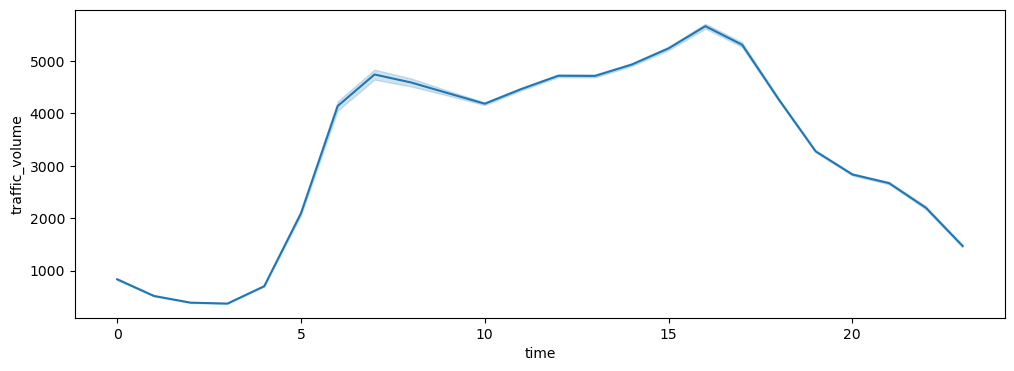

In [19]:
fig, (axis2) = plt.subplots( 1, figsize = (12,4))
sns.lineplot(x = 'time', y = 'traffic_volume', data = train_df, ax = axis2);
plt.show()

This indicates that metro is busiest in between afternoon and evening

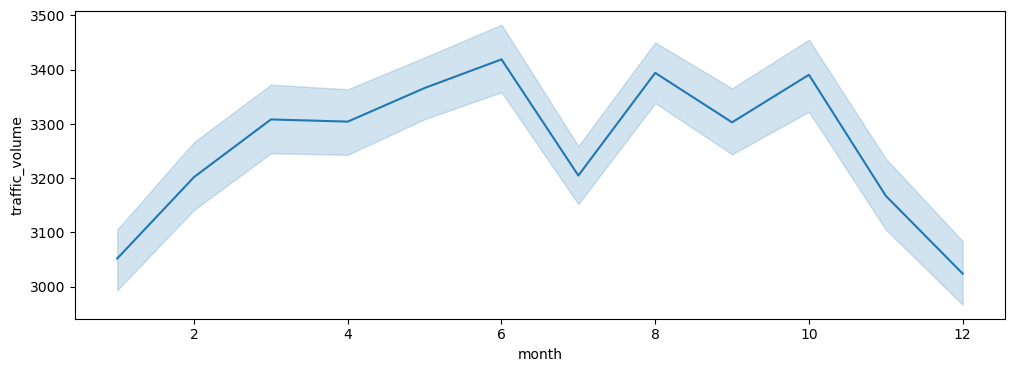

In [20]:
fig, (axis2) = plt.subplots( 1, figsize = (12,4))
sns.lineplot(x = 'month', y = 'traffic_volume', data = train_df, ax = axis2);
plt.show()

June ,August,October are the busiest months

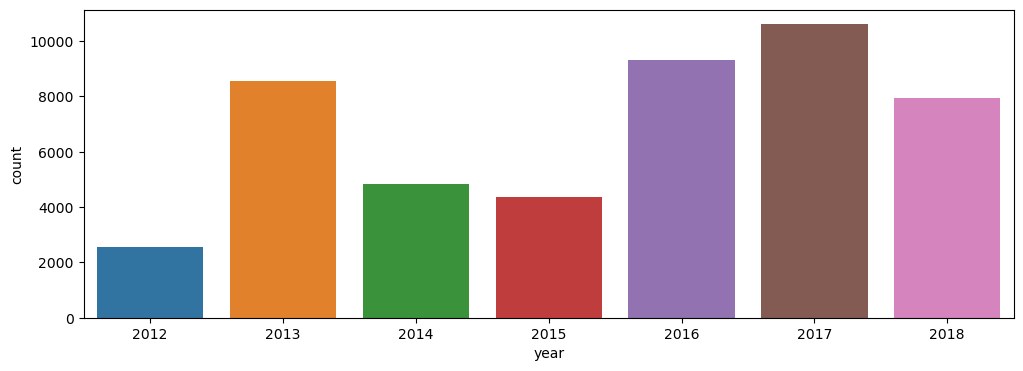

In [21]:
fig, (axis1) = plt.subplots(1,  figsize = (12,4))
sns.countplot(x = 'year', data = train_df, ax = axis1)
plt.show()

2017 turned out to be full capacitied month for us metro

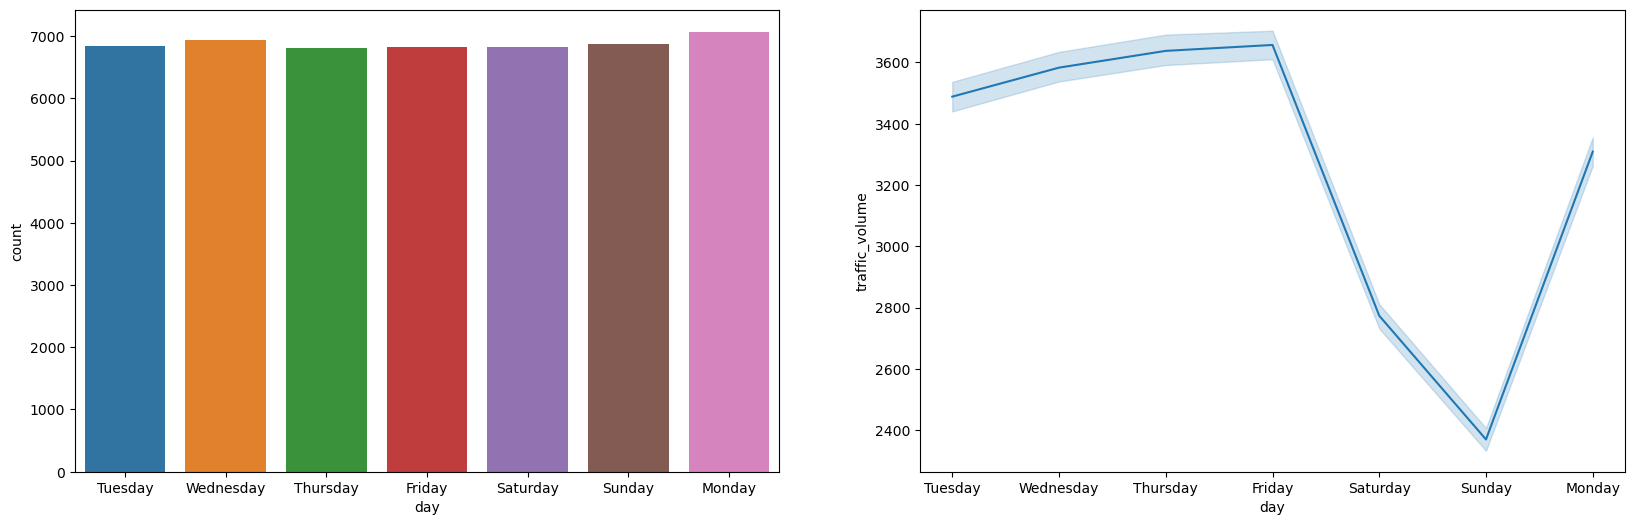

In [22]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (20,6))
sns.countplot(x = 'day', data = train_df, ax = axis1)
sns.lineplot(x = 'day', y = 'traffic_volume', data = train_df, ax = axis2);
plt.show()

Metro were least used on Wednesday

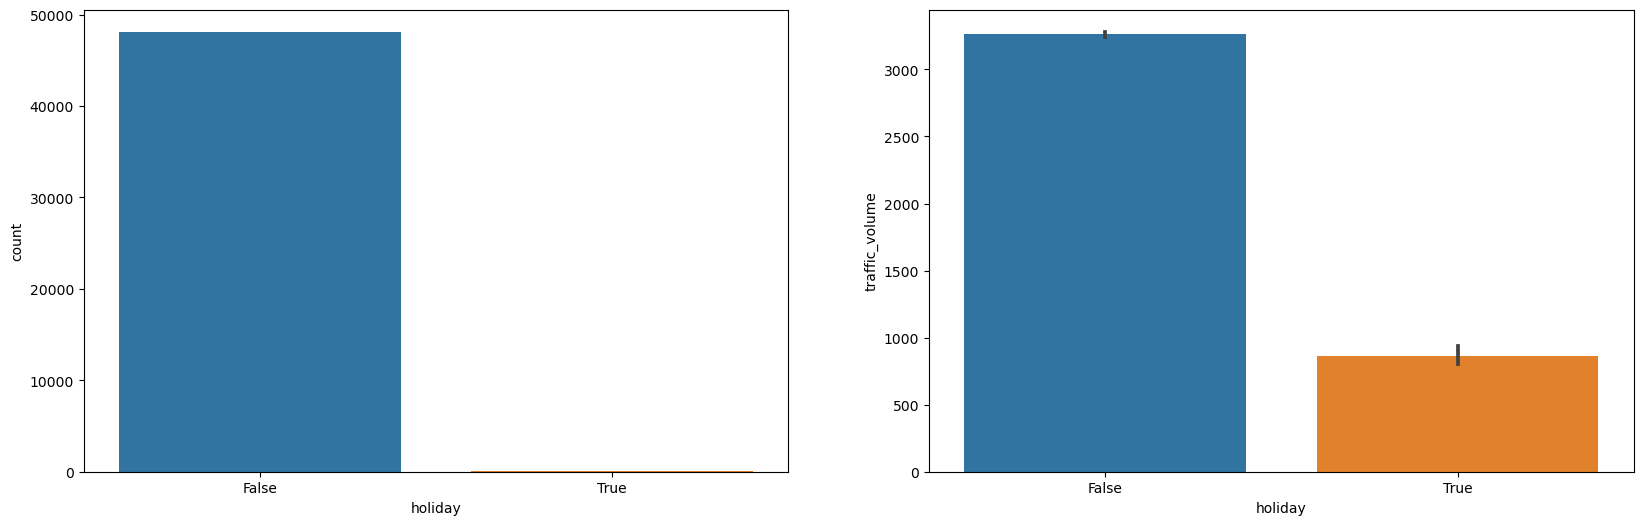

In [23]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (20,6))
sns.countplot(x = 'holiday', data = train_df, ax = axis1)
sns.barplot(x = 'holiday', y = 'traffic_volume', data = train_df, ax = axis2);
plt.show()

Metros were used more on working days rather than on holidays

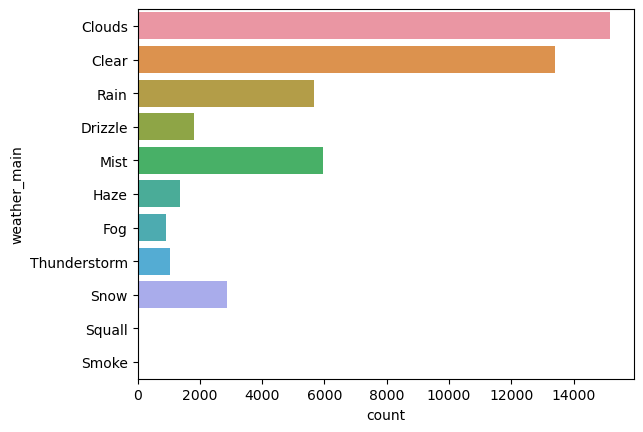

In [24]:
#exploring different categories in weather_main
df=pd.read_csv("C:\\Users/Prithish/Desktop/Metro_Interstate_Traffic_Volume.csv")
sns.countplot(y='weather_main', data=df) 
plt.show()

It indicates that climate in us is mostly cloudy and clear

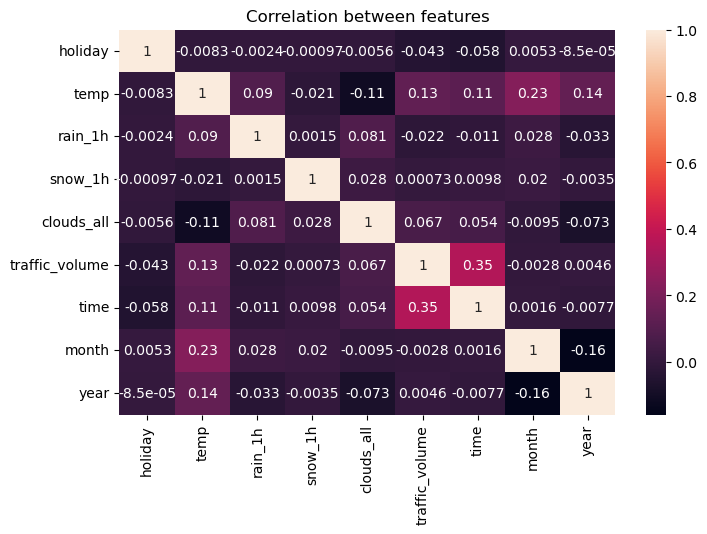

In [25]:
plt.figure(figsize=(8, 5))
plt.title('Correlation between features')
sns.heatmap(train_df.corr(), annot = True);
plt.show()

Nearly no Correlation between fields

In [26]:
train_df.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'time', 'month',
       'year', 'day'],
      dtype='object')

## PRE PROCESSING

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
# drop the unrequired columns
train_df.drop(['date_time', 'weather_description'], axis = 1, inplace = True)

In [29]:
# convert values of day column to numerical format
encoder = LabelEncoder()
train_df['day'] = encoder.fit_transform(train_df['day'])

In [30]:
# subtract 242 from the temp column as there is no temperature below it
train_df['temp'] = train_df['temp'] - 242

In [31]:
# convert the values of weather_main column to numerical format
encoder = LabelEncoder()
train_df['weather_main'] = encoder.fit_transform(train_df['weather_main'])

## ML MODELS

In [32]:
# import the required modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [33]:
(X, Y) = (train_df.drop(['traffic_volume'], axis = 1).values, train_df['traffic_volume'].values)

# Scale the values
scaler = StandardScaler()
X = scaler.fit_transform(X)

(X_train, X_val, Y_train, Y_val) = train_test_split(X, Y)
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_val shape:" + str(X_val.shape))
print("Y_val shape:" + str(Y_val.shape))

X_train shape:(36144, 10)
Y_train shape:(36144,)
X_val shape:(12049, 10)
Y_val shape:(12049,)


In [34]:
# DataFrame to store the RMSE scores of various algorithms
results = pd.DataFrame(columns = ['RMSE'])

In [35]:
import math

In [36]:
# helper function to evaluate a model
def evaluate_model(regressor, name):
    # train and test scores
    train_score = round(regressor.score(X_train, Y_train), 2)
    val_score = round(regressor.score(X_val, Y_val), 2)
    # predicted output
    Y_pred = regressor.predict(X_val)

    print(name + ' Train score: ', train_score)
    print(name + 'Test score: ', val_score)
    print('Root Mean Squared error: ', sqrt(mean_squared_error(Y_val, Y_pred)))
    print('Coefficient of determination: ', r2_score(Y_val, Y_pred))
    
    # add the current RMSE to the scores list
    results.loc[name] = sqrt(mean_squared_error(Y_val, Y_pred))
    
    # plot predicted vs true values
    x_points=np.linspace(0,8e3)
    plt.figure(figsize=(12,5))
    plt.plot(x_points, x_points, color='r')
    plt.scatter(Y_val, Y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True Values Vs Predicted Values');
    plt.show()

In [37]:
lireg = LinearRegression()
lireg.fit(X_train, Y_train)

LinearRegression()

Linear Regression Train score:  0.14
Linear RegressionTest score:  0.15
Root Mean Squared error:  1838.0477958414156
Coefficient of determination:  0.14570099634700295


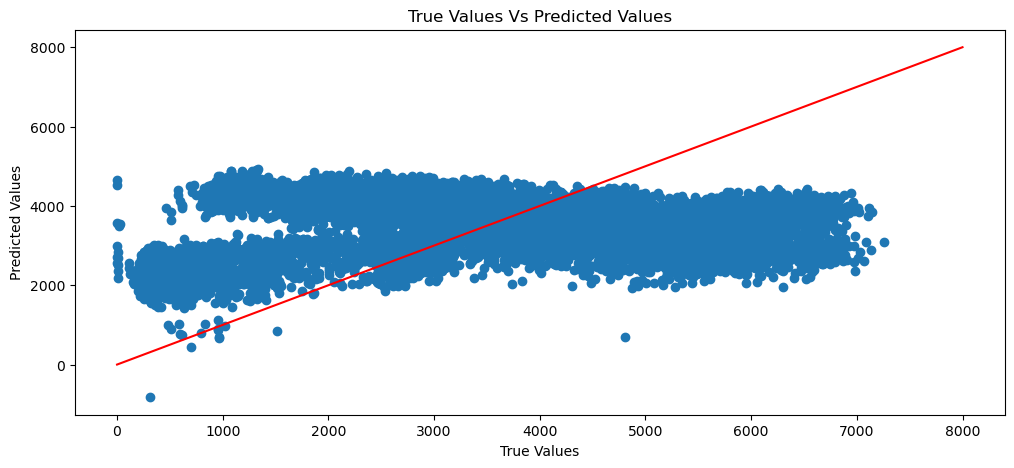

In [38]:
# evaluate the Regressor
evaluate_model(lireg, 'Linear Regression')

In [39]:
dtreg = DecisionTreeRegressor(max_depth = 12)
dtreg.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=12)

Decision Tree Train score:  0.96
Decision TreeTest score:  0.94
Root Mean Squared error:  480.88604005598745
Coefficient of determination:  0.9415235985786556


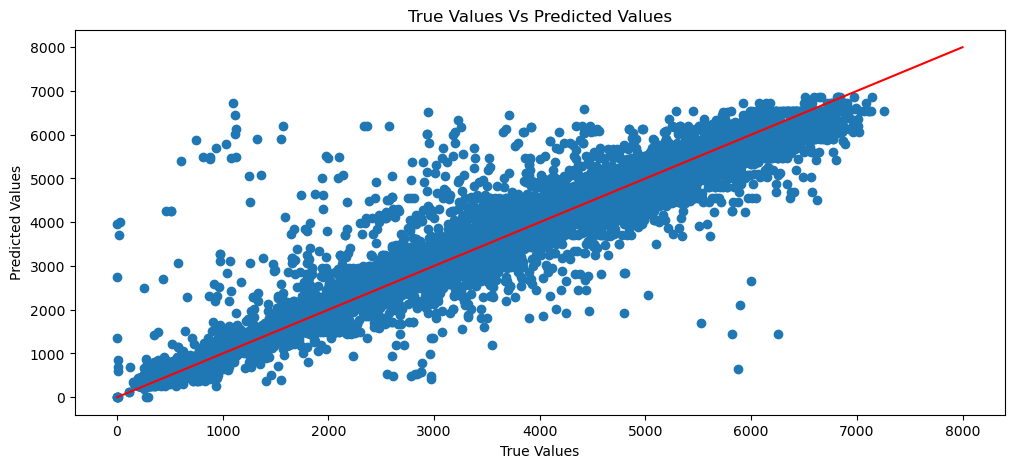

In [40]:
# EVALUATING DECISION TREE
evaluate_model(dtreg,'Decision Tree')

In [41]:
# n_estimators - The number of trees in the forest.
# min_samples_split - The minimum number of samples required to split an internal node
rfreg = RandomForestRegressor(n_estimators = 50, max_depth = 12, min_samples_split = 5)
rfreg.fit(X_train, Y_train)



RandomForestRegressor(max_depth=12, min_samples_split=5, n_estimators=50)

Random Forest Train score:  0.96
Random ForestTest score:  0.95
Root Mean Squared error:  435.67942424951525
Coefficient of determination:  0.9520011978663097


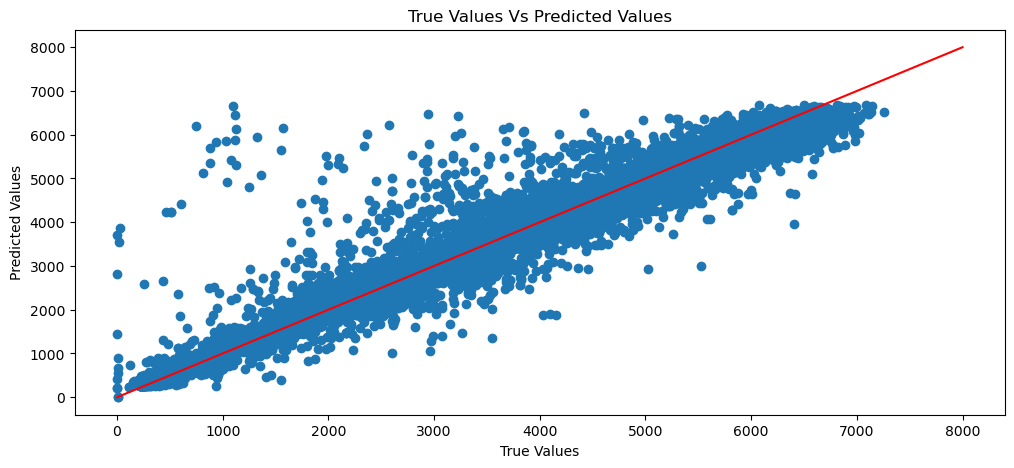

In [42]:
# evaluate the Regressor
evaluate_model(rfreg, 'Random Forest')


In [43]:

### Using Gradient Boosting

# n_estimators - The number of boosting stages to perform.
# max_depth - maximum depth of the individual regression estimators.
gbreg = GradientBoostingRegressor(n_estimators=500, max_depth=10)
gbreg.fit(X_train, Y_train)


GradientBoostingRegressor(max_depth=10, n_estimators=500)

Gradient Boosting Train score:  1.0
Gradient BoostingTest score:  0.97
Root Mean Squared error:  366.3496112732011
Coefficient of determination:  0.9660618809216756


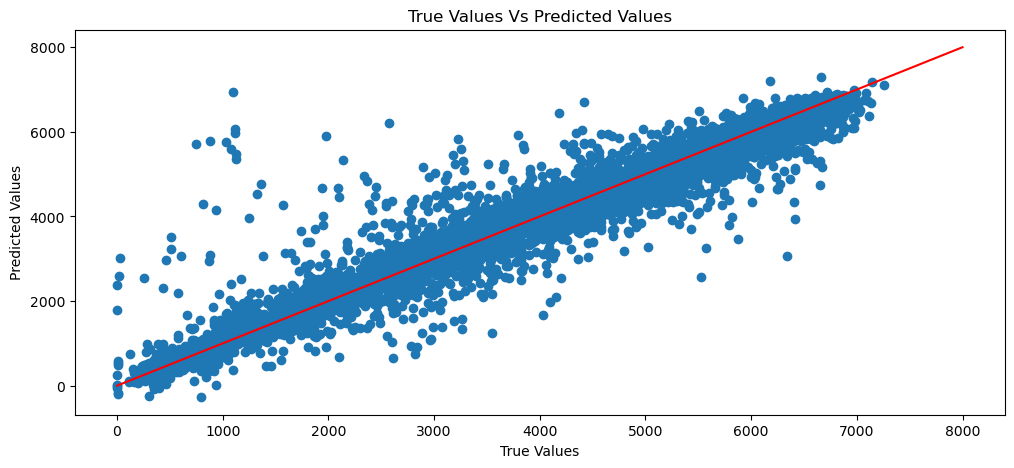

In [44]:

# evaluate the Regressor
evaluate_model(gbreg, 'Gradient Boosting')


In [45]:

### Using AdaBoost

# n_estimators - The number of trees in the forest.
# learning_rate - Learning rate shrinks the contribution of each classifier by learning_rate.
adareg = AdaBoostRegressor(base_estimator=dtreg, n_estimators=50, learning_rate=0.01)
adareg.fit(X_train, Y_train)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=12),
                  learning_rate=0.01)

Ada Boost Train score:  0.97
Ada BoostTest score:  0.95
Root Mean Squared error:  436.5187986434271
Coefficient of determination:  0.9518160719535075


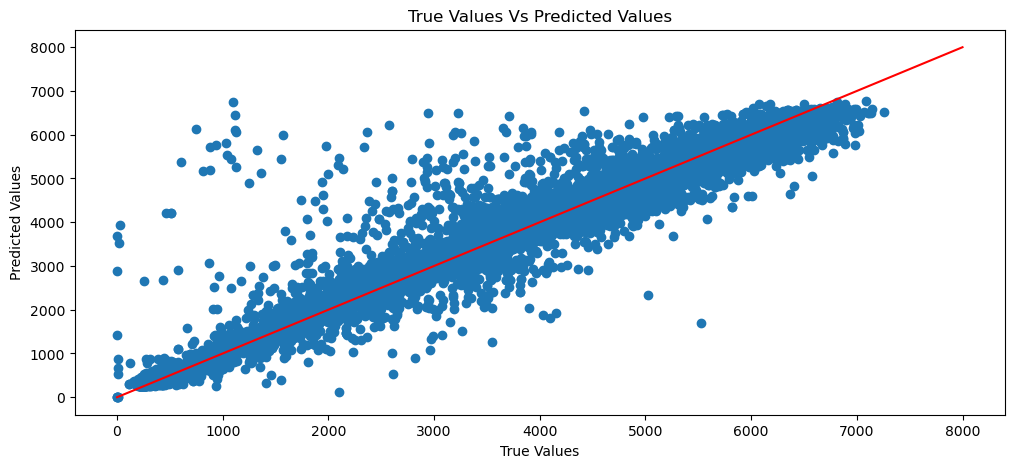

In [46]:

# evaluate the Regressor
evaluate_model(adareg, 'Ada Boost')


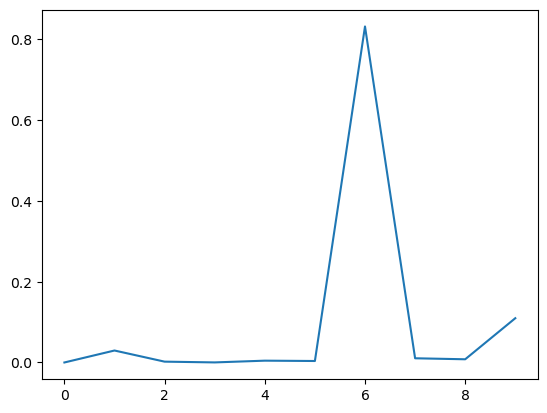

In [47]:
plt.plot(gbreg.feature_importances_)
plt.show()

In [48]:
#XGBOOST REGRESSOR
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
xgb_model.fit(X_train, Y_train)


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

XG Boost Train score:  0.86
XG BoostTest score:  0.86
Root Mean Squared error:  748.759008036884
Coefficient of determination:  0.8582312795655032


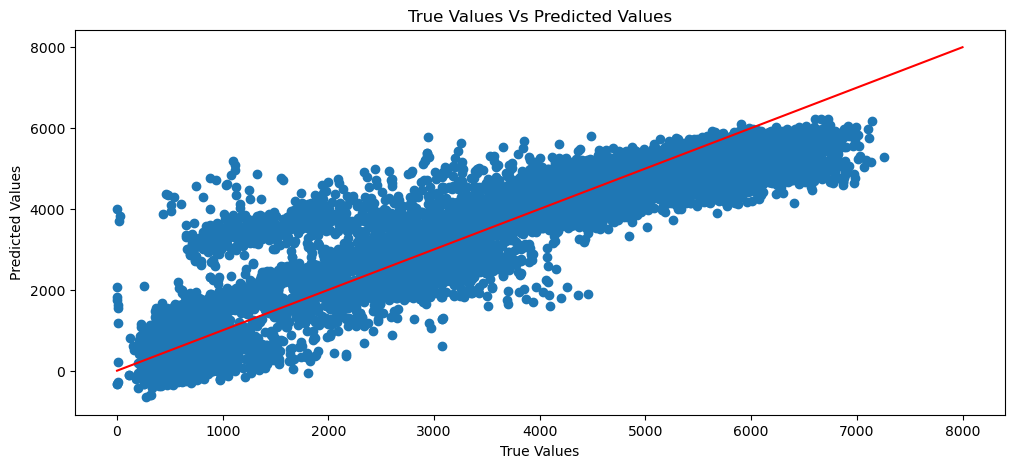

In [49]:
# EVALUATING MODEL
evaluate_model(xgb_model, 'XG Boost')

In [50]:
## KNN MOdel
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, Y_train)

KNeighborsRegressor()

KNN Train score:  0.88
KNNTest score:  0.82
Root Mean Squared error:  842.0972110762008
Coefficient of determination:  0.8206832920635968


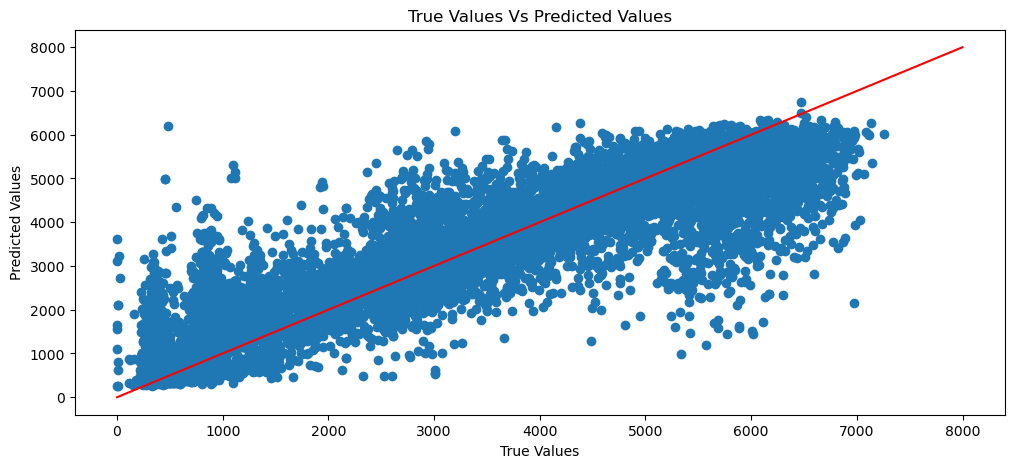

In [51]:
#EVALUATING THE MODEL
evaluate_model(knn_model,'KNN')

In [52]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

en = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)

# Fit the model on the training data
en.fit(X_train, Y_train)


ElasticNet(random_state=42)

Elastic Net Regression Train score:  0.13
Elastic Net RegressionTest score:  0.13
Root Mean Squared error:  1855.1936926539927
Coefficient of determination:  0.1296883095018635


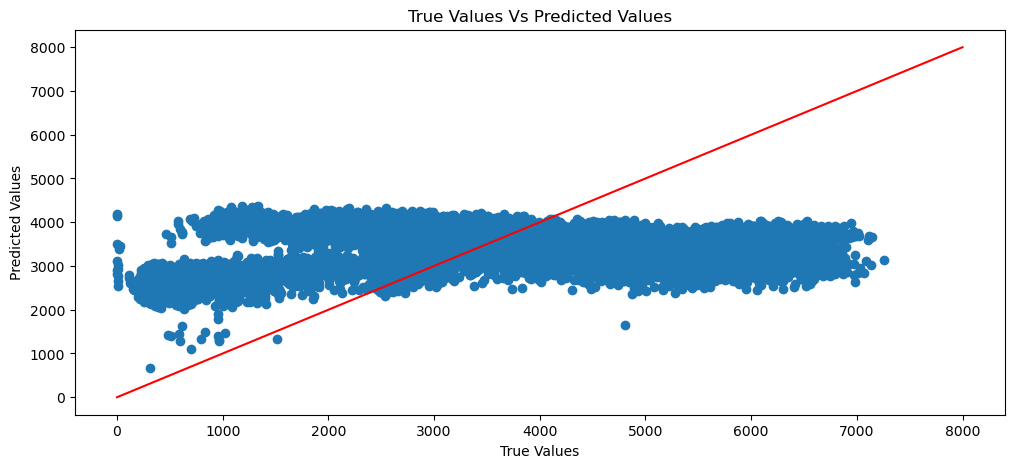

In [53]:
evaluate_model(en,'Elastic Net Regression')

In [54]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train, Y_train)

SVR(C=100, gamma=0.1)

SVR Train score:  0.69
SVRTest score:  0.69
Root Mean Squared error:  1106.7290774572866
Coefficient of determination:  0.6902730898938618


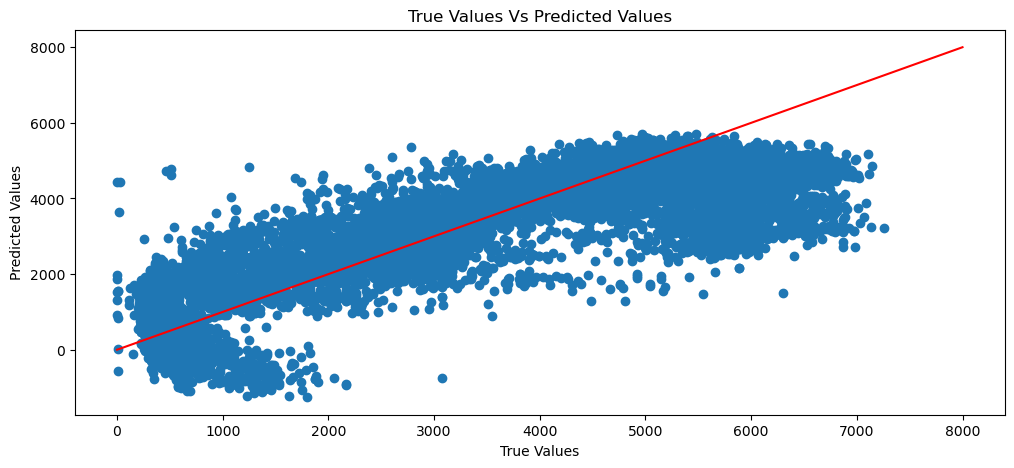

In [55]:
#EVALUATE
evaluate_model(svr,'SVR')

In [56]:
## Comparison between all the above algorithms
results

,RMSE
Linear Regression,1838.047796
Decision Tree,480.886040
Random Forest,435.679424
Gradient Boosting,366.349611
Ada Boost,436.518799
XG Boost,748.759008
KNN,842.097211
Elastic Net Regression,1855.193693
SVR,1106.729077


In [57]:
train_df.to_csv('Cleaned_data.csv')

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [61]:

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6]
}

# Define the gradient boosting regressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Perform grid search
grid_search = GridSearchCV(gb_model, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=3)
grid_search.fit(X_train, Y_train)



Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100;, score=-517359.703 total time=   2.7s
[CV 2/5] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100;, score=-500306.790 total time=   2.7s
[CV 3/5] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100;, score=-491180.026 total time=   2.6s
[CV 4/5] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100;, score=-507778.202 total time=   2.6s
[CV 5/5] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100;, score=-525529.294 total time=   2.7s
[CV 1/5] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=200;, score=-419935.586 total time=   5.5s
[CV 2/5] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=200;, score=-410818.337 total time=   5.2s
[CV 3/5] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimato

NameError: name 'test_X' is not defined

In [62]:
# Predict on the test set
predictions = grid_search.predict(X_val)

# Compute evaluation metrics
mse = mean_squared_error(Y_val, predictions)
rmse = np.sqrt(mse)

# Print the best parameters and evaluation metrics for the grid search
print("Grid Search Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Negative Mean Squared Error: {-grid_search.best_score_:.2f}")
print(f"RMSE on Test Set: {rmse:.2f}")

Grid Search Results:
Best Parameters: {'learning_rate': 0.15, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}
Best Negative Mean Squared Error: 183927.20
RMSE on Test Set: 407.82


In [63]:
results

,RMSE
Linear Regression,1838.047796
Decision Tree,480.886040
Random Forest,435.679424
Gradient Boosting,366.349611
Ada Boost,436.518799
XG Boost,748.759008
KNN,842.097211
Elastic Net Regression,1855.193693
SVR,1106.729077
